Lung cancer patient nodules count:

the aim of developing this model is to analyse the count of
nodules in lung cancer patient given their habits(eg. smoker or alcohol consumer)
and basic medical background.

In [29]:
import pandas as pd

In [30]:
# get the name of the data file and data description
!ls

hcc-data.txt  hcc-description.txt  lung_caner_nodules.ipynb  README.md


In [31]:
!cat hcc-description.txt

{\rtf1\ansi\ansicpg1252\cocoartf1504\cocoasubrtf830
{\fonttbl\f0\fmodern\fcharset0 Courier;}
{\colortbl;\red255\green255\blue255;}
{\*\expandedcolortbl;;}
\paperw11900\paperh16840\margl1440\margr1440\vieww25100\viewh13180\viewkind0
\deftab720
\pard\pardeftab720\partightenfactor0

\f0\fs26 \cf0 \expnd0\expndtw0\kerning0
Citation Request:\
Please include this citation if you plan to use this database:\
\
\pard\pardeftab720\partightenfactor0
\cf0 \kerning1\expnd0\expndtw0 Miriam Seoane Santos, Pedro Henriques Abreu, Pedro J. Garc\'eda-Laencina, Ad\'e9lia Sim\'e3o, Armando Carvalho, \'93A new cluster-based oversampling method for improving survival prediction of hepatocellular carcinoma patients\'94, Journal of biomedical informatics, 58, 49-59, 2015.\expnd0\expndtw0\kerning0
\
\
\
1. Title: Hepatocellular Carcinoma Dataset (HCC dataset) \
\
2. Source Information\
   -- Donors of database: \
	\kerning1\expnd0\expndtw0 Miriam Seoane Santos (miriams@student.dei.uc.pt)\
	Pedro Henriques Abreu

*From the information above we find that there are mising entries in the dataset , therefore we decided to remove the row where there are missing entries.

*to make this simple model we decided to limit the attributes to 10 from the orginal 50.

*we decided the 10 attributes to be the follwing: 

    1.gender                       2.alcohol consumer

    3.smoker                       4.diabetic

    5.obese                        6. age when diagnosed

    7.grams of alcohol perday      8.packs of cigaets perday
    
    9.number of nodules            10. oxygen saturation





In [32]:
df = pd.read_csv('hcc-data.txt' , header = None , delimiter = ',') 

In [33]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,1,0,1,0,0,0,0,1,0,1,...,150,7.1,0.7,1,3.5,0.5,?,?,?,1
1,0,?,0,0,0,0,1,1,?,?,...,?,?,?,1,1.8,?,?,?,?,1
2,1,0,1,1,0,1,0,1,0,1,...,109,7,2.1,5,13,0.1,28,6,16,1
3,1,1,1,0,0,0,0,1,0,1,...,174,8.1,1.11,2,15.7,0.2,?,?,?,0
4,1,1,1,1,0,1,0,1,0,1,...,109,6.9,1.8,1,9,?,59,15,22,1


In [34]:
#remove unused attributes from the dataframe
df = df.loc[ : ,[0 , 2 , 9 , 10 , 11 , 23 , 24 , 25 , 43 , 47]]

In [35]:
#rename column names as the attributes name
df.columns = [ 'gender' , 'alcohol_consumer' , 'smoker' , 'diabetic' , 'obese' , 'age_when_diagnosed' , 'grams_of_alcohol_per_day' , 'packs_of_cigarets_per_day' , 'number_of_nodules' , 'oxygen_saturation']

In [36]:
#check the columns are renamed
df.head()

,gender,alcohol_consumer,smoker,diabetic,obese,age_when_diagnosed,grams_of_alcohol_per_day,packs_of_cigarets_per_day,number_of_nodules,oxygen_saturation
0,1,1,1,1,?,67,137,15,1,?
1,0,0,?,1,0,62,0,?,1,?
2,1,1,1,0,0,78,50,50,5,6
3,1,1,1,1,0,77,40,30,2,?
4,1,1,1,0,0,76,100,30,1,15


In [37]:
#check the total count of data
df.shape

(165, 10)

In [38]:
#replace the missing entries '?' with "NaN" to help remove them later
df = df[df != '?']

In [39]:
#confirm the '?' are replace with NaN
df.head()

,gender,alcohol_consumer,smoker,diabetic,obese,age_when_diagnosed,grams_of_alcohol_per_day,packs_of_cigarets_per_day,number_of_nodules,oxygen_saturation
0,1,1,1,1,NaN,67,137,15,1,NaN
1,0,0,NaN,1,0,62,0,NaN,1,NaN
2,1,1,1,0,0,78,50,50,5,6
3,1,1,1,1,0,77,40,30,2,NaN
4,1,1,1,0,0,76,100,30,1,15


In [40]:
#confirm the '?' are replace with NaN
df.isnull().sum()

gender                        0
alcohol_consumer              0
smoker                       41
diabetic                      3
obese                        10
age_when_diagnosed            0
grams_of_alcohol_per_day     48
packs_of_cigarets_per_day    53
number_of_nodules             2
oxygen_saturation            80
dtype: int64

In [41]:
#remove rows with missing entry
df = df.dropna(how = 'any')

In [42]:
#confirm the missing entries are removed
df.isnull().sum()

gender                       0
alcohol_consumer             0
smoker                       0
diabetic                     0
obese                        0
age_when_diagnosed           0
grams_of_alcohol_per_day     0
packs_of_cigarets_per_day    0
number_of_nodules            0
oxygen_saturation            0
dtype: int64

In [43]:
#check the count of remaining data
df.shape

(42, 10)

In [44]:
df.dtypes

gender                        int64
alcohol_consumer              int64
smoker                       object
diabetic                     object
obese                        object
age_when_diagnosed            int64
grams_of_alcohol_per_day     object
packs_of_cigarets_per_day    object
number_of_nodules            object
oxygen_saturation            object
dtype: object

*we need to change the data type of the attributes from string to a numerical value like "int" or "float" in order to perform data analysis and build 
the model

*we decided to make the data type of all attribute to be type "float" as this should not effect the data analysis.

In [45]:
# confirm they are converted to type float
df = df.astype(float)
df.dtypes

gender                       float64
alcohol_consumer             float64
smoker                       float64
diabetic                     float64
obese                        float64
age_when_diagnosed           float64
grams_of_alcohol_per_day     float64
packs_of_cigarets_per_day    float64
number_of_nodules            float64
oxygen_saturation            float64
dtype: object

In [46]:
#import libraries for data visualisation
import seaborn as sns
import matplotlib.pyplot as plt

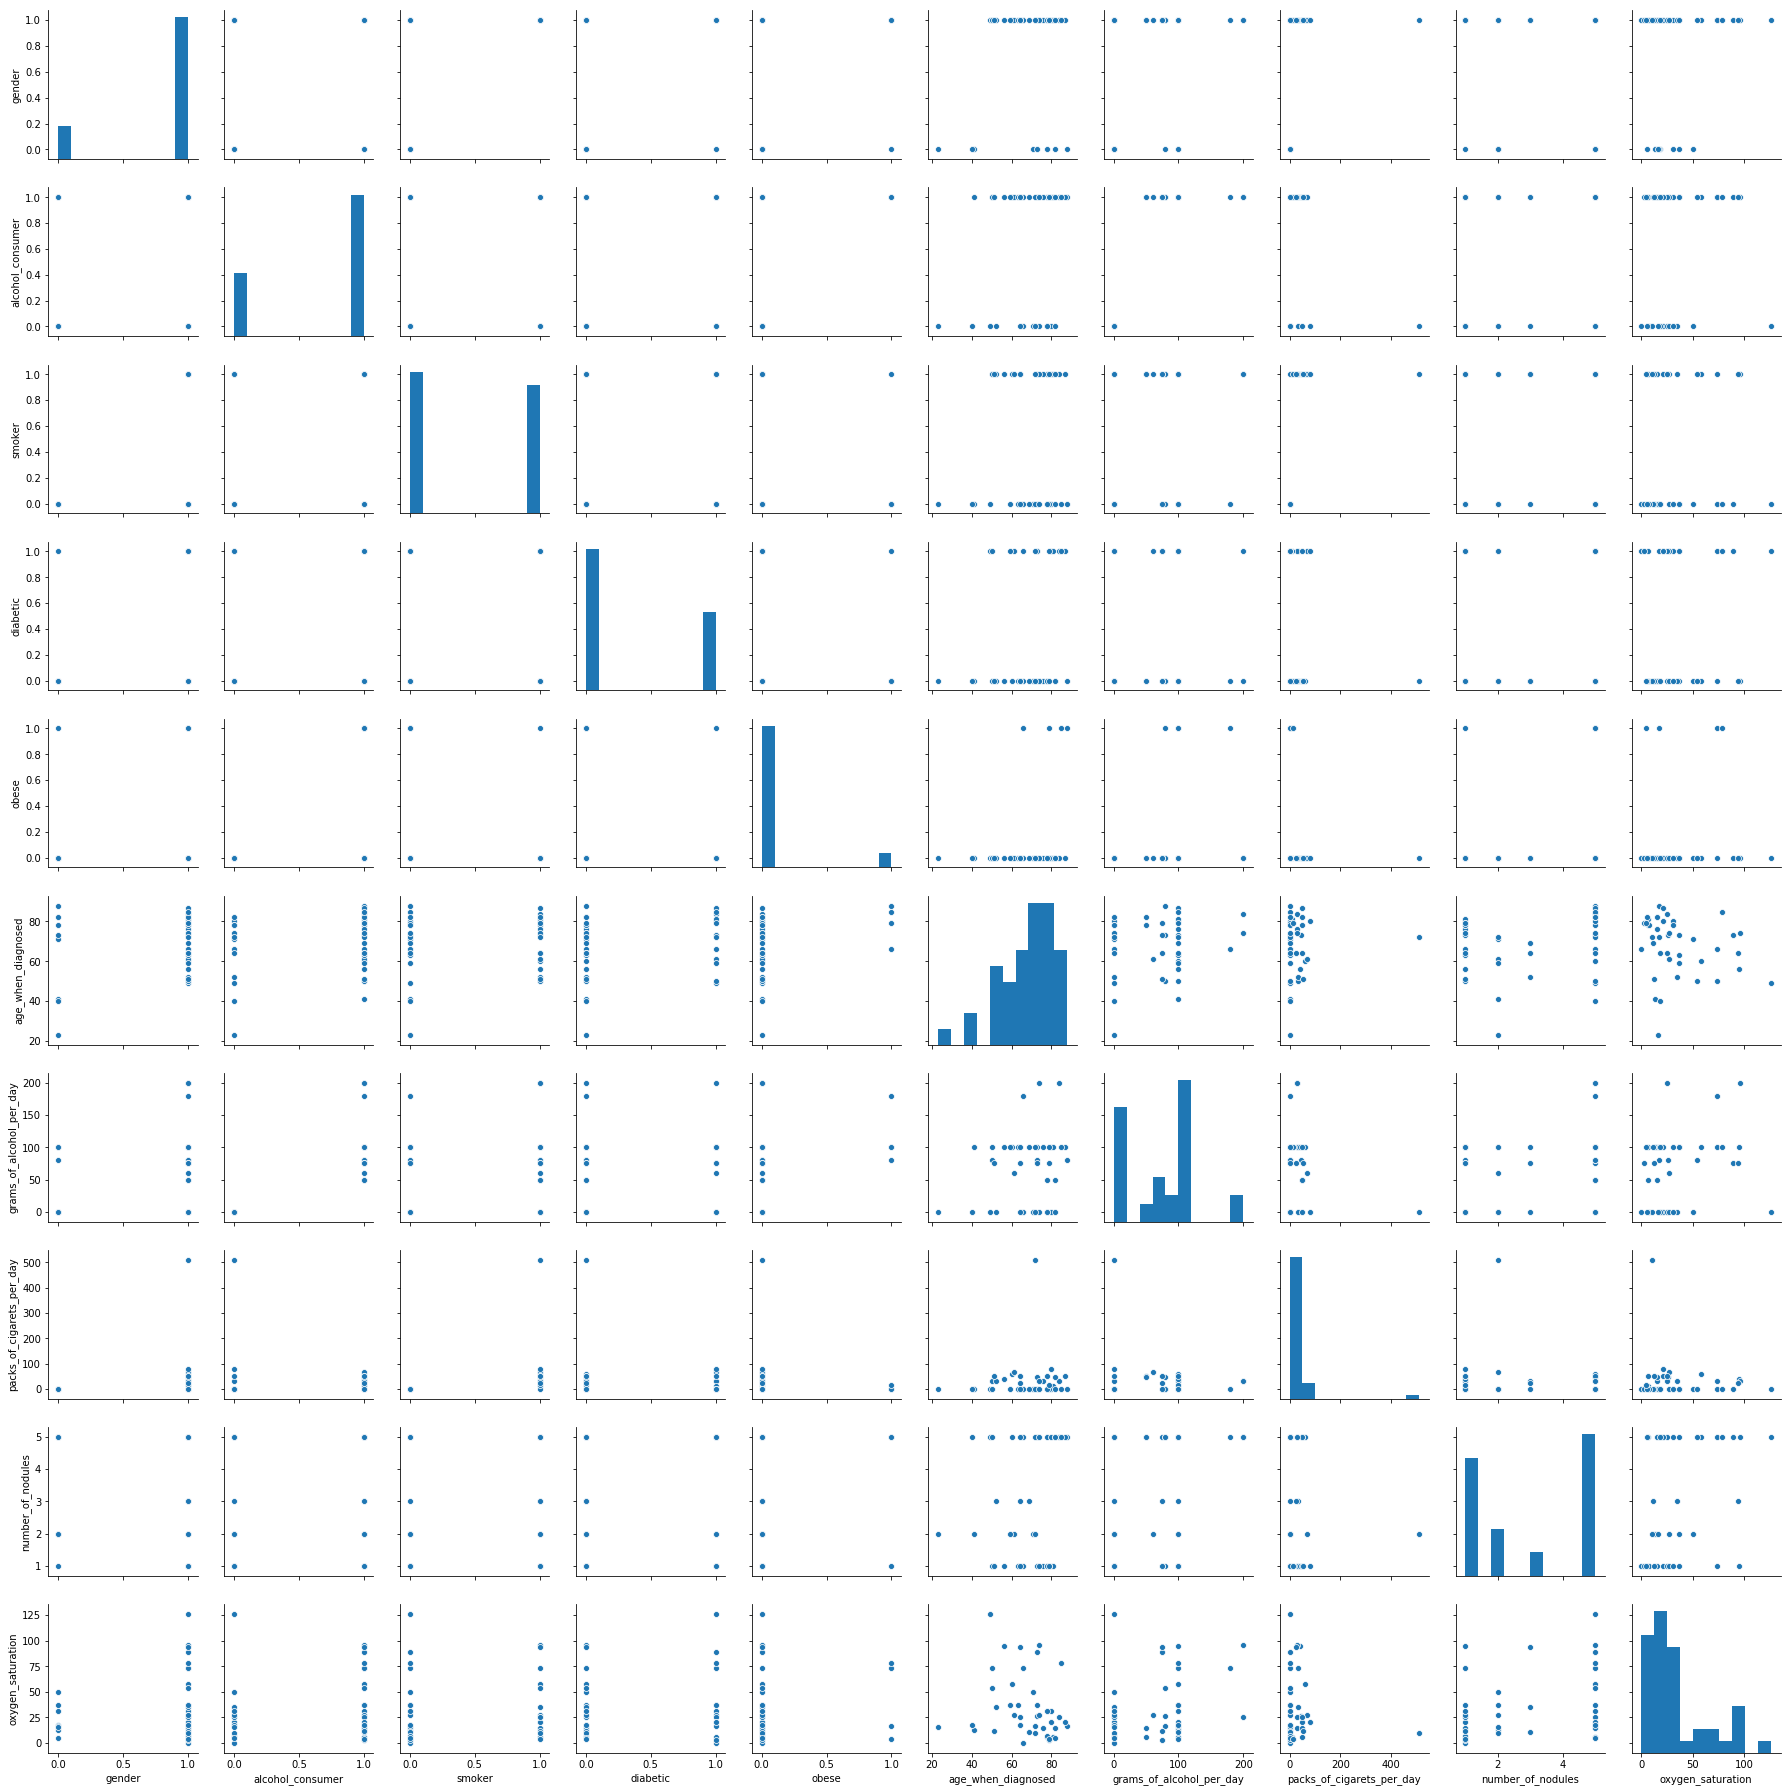

In [47]:
#df = df.apply(lambda x: pd.to_numeric(x, errors='coerce'))
sns.pairplot(df)

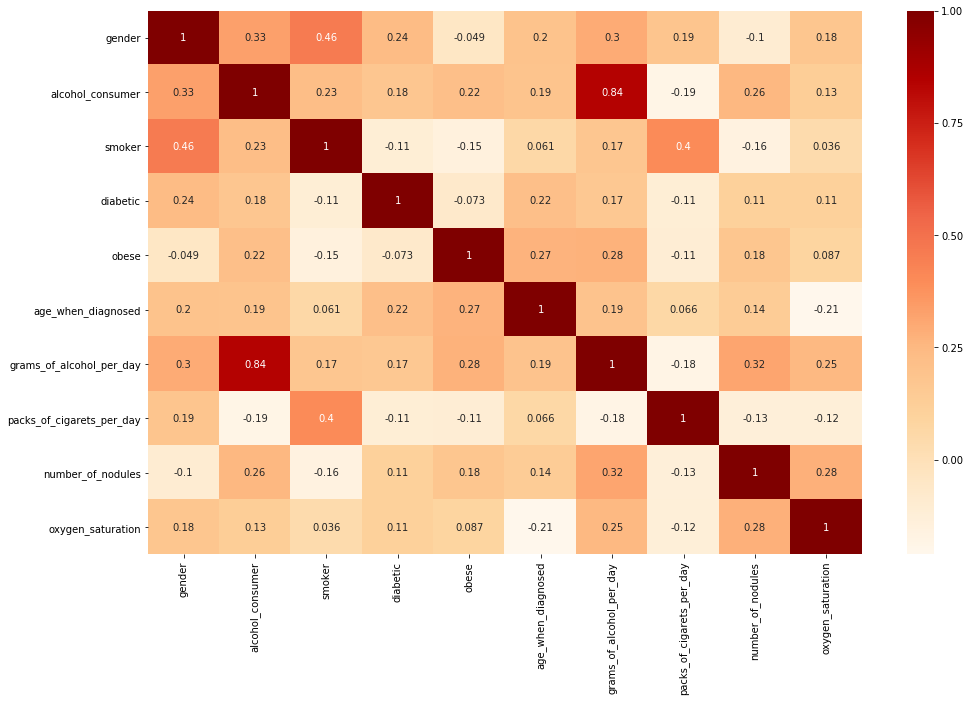

In [48]:
ax , fig = plt.subplots(figsize = ( 16,10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix , annot = True , cmap = 'OrRd')

*The correlation between the attributes is weak , this could be because of the small sample.


*we need to split the orginal daframe into the machine learning learning training set and test set



In [49]:
#import library to split the dataset
from sklearn.model_selection import train_test_split

#create input data set
x_df = df.drop('number_of_nodules' , axis = 1)
#confirm the number of nodules is removed
x_df.head()

,gender,alcohol_consumer,smoker,diabetic,obese,age_when_diagnosed,grams_of_alcohol_per_day,packs_of_cigarets_per_day,oxygen_saturation
2,1.0,1.0,1.0,0.0,0.0,78.0,50.0,50.0,6.0
4,1.0,1.0,1.0,0.0,0.0,76.0,100.0,30.0,15.0
6,1.0,0.0,0.0,1.0,0.0,49.0,0.0,0.0,126.0
8,1.0,1.0,1.0,1.0,0.0,50.0,100.0,32.0,73.0
15,0.0,1.0,0.0,0.0,0.0,41.0,100.0,0.0,13.0


In [50]:
#creata output data set(answers)
y_df = df['number_of_nodules']
y_df.head()

2     5.0
4     1.0
6     5.0
8     1.0
15    2.0
Name: number_of_nodules, dtype: float64

In [51]:
#split the orginal data set into training set and test set
train_x , test_x , train_y , test_y = train_test_split(x_df , y_df , test_size =0.2 , random_state =42)

In [52]:
#import library for machine learning model
from sklearn.linear_model import LinearRegression
#create the machine learming model
model = LinearRegression()

In [53]:
#train the model
model.fit(train_x ,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [54]:
#test the model
predicted = model.predict(test_x)

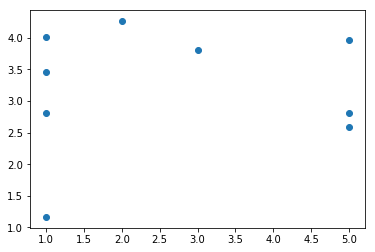

In [55]:
#plot the output of the model test
plt.scatter(test_y,predicted)

In [56]:
#qunatify the accurracy of the model
model.score(test_x,test_y)

-0.2819441980697672

Comments on the model:
    
    *the accuracy of the model is too low so the model is not useful. This may be because of the small sample that is available. However given a larger sample the accuracy of the model may increase.
    